In [1]:
import csv
import pandas as pd
import googlemaps
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re


In [2]:
url = 'http://www.justice.gov/eoir/eoir-immigration-court-listing'
response = requests.get(url)
response
soup = BeautifulSoup(response.text,'html.parser')
CIJ = soup.find_all('a', {'href':re.compile(r'bios')})
for judge in CIJ:
    print(judge.text)

Daniel H. Weiss 
Daniel J. Daugherty
Sheila McNulty
E. Mark Barcus
Jefferson B. Brown
David Cheng
Grady A. Crooks
Jaime Diaz
Eric L. Dillow
Irene C. Feldman
Melissa Joy Garcia
Colleen M. Glaser-Allen
Renae M. Hansell
Megan B. Herndon
Jonathan W. Hitesman
Theresa Holmes-Simmons 
Megan R. Jackler
Brandon C. Jaroch
Matthew W. Kaufman
Daniel P. Kinnicutt
Charles P. Koutras
Joy Lampley-Fortson
Anna C. Little
Lisa Luis
Daren K. Margolin
H. Kevin Mart
Jeffrey S. Miller
Tara Naselow-Nahas
Alfredia Owens 
Anne Kristina Perry
Jennifer I. Peyton
Rodin Rooyani
Theresa M. Scala 
Noelle Sharp
 
Elisa M. Sukkar 
Khalilah M. Taylor 
Ubaid ul-Haq
Rebecca J. Walters
Ryan R. Wood
Elizabeth L. Young


In [3]:
# once we have a list of judges we can look them up on rate my judge 
# https://www.ratemyimmigrationjudge.com/listing/hon-john-w-cortes-immigration-judge-new-york-varick-immigration-court/

In [4]:
# currently works
ct_info = [addy.text.strip() for addy in soup.findAll('td')[1:]]

In [5]:
my_list = [12, 65, 54, 39, 102, 339, 221, 50, 70, ]
  
# use anonymous function to filter and comparing 
# if divisible or not
result = list(filter(lambda x: (x % 13 == 0), my_list)) 

In [6]:
import pandas as pd
import numpy as np
names = ['Court','Address','Judges','Immigration Judges', 'Court Administrator']
columns = ['Court','Address','Judges','Ct Admin']
result = list(filter(lambda x : x not in names,ct_info))


In [7]:
print('# of blanks->',result.count(""))
first_blank = result.index("",0)
second_blank = result.index("",first_blank+1)
third_blank = result.index("",second_blank+1)


print('first blank',first_blank)
print('second blank',second_blank)
print('second blank',third_blank)


# of blanks-> 4
first blank 202
second blank 203
second blank 276


In [8]:
print("before removal of the blank",len(result))
del result[276]
# del result[200:204]
print('After the removal',len(result))


num_courts = len(result)//4

add_list=[]
for i in range(num_courts):
    to_add = np.array([result[i*4],result[i*4+1],result[i*4+2],result[i*4+3]])
    add_list.append(to_add)

before removal of the blank 293
After the removal 292


In [9]:
columns = ['Court','Address','Judges','Ct Admin']
df2 = pd.DataFrame(np.array(add_list),columns=columns)
df2 = df2.replace(r'\t',' ', regex=True)
df2.tail()

,Court,Address,Judges,Ct Admin
68,Falls Church IAC,"5107 Leesburg Pike\n Falls Church, VA 22041\...","De Cardona, Lisa\n Farrar-Crockett, Emily N....","Meyers, Natalie"
69,Richmond IAC,"10 S. 6th Street\n Richmond, VA 23219\n 80...","Adler, Steven V.\n Glass, Andrew J.\n Kapl...","English-Figueroa, Yolanda"
70,Sterling,Scheduled Opening Fall 2022,"Bonet, Illya-Karina\n Davis, Michael P.\n ...",
71,Seattle,"915 2nd Ave., Suite 613\n Seattle, WA 98174\...","Evans, David W.\n Johnson, Shane E.\n McSe...","Neifert, Joseph"
72,Tacoma,"1623 East J Street, Suite 3\n Tacoma, WA 984...","Fitting, Tammy\n Floyd, Charles Neil\n Ode...","Lopez, Edwin"


In [10]:
# 
# \d{5}\-?\d{0,4}
us_zip2 = r"\b[A-Z]{2}\b\s\d{5}\-?\d{0,4}"

addy = df2['Address'][1]
print(addy)
re.search(us_zip2, addy).group()

3260 N. Pinal Parkway Avenue
   Florence, AZ 85132
   520-868-3341


'AZ 85132'

In [11]:
def extract_zip(df,col):
    us_zip = r"\b[A-Z]{2}\b\s\d{5}\-?\d{0,4}"
    us_zip2 = r"\b[A-Z]{2}\b\s\s\d{5}\-?\d{0,4}"

    zip_list = []
    for i in range(len(df[col])):
        addy = df[col][i]
        try:
            zip_res = re.search(us_zip, addy).group()
        except AttributeError:
            zip_res = "xx"

        zip_list.append(zip_res)
    df['State_zipcode'] = zip_list
    # to grab Hyattsville
    zip_list2 = []
    for i in range(len(df[col])):
        addy = df[col][i]
        try:
            zip_res = re.search(us_zip2, addy).group()
        except AttributeError:
            zip_res = "xx"
        

        zip_list2.append(zip_res)
    df['State_zipcode2'] = zip_list2


extract_zip(df2,"Address")

# 20166 - Sterling
df2[28:32]

,Court,Address,Judges,Ct Admin,State_zipcode,State_zipcode2
28,Baltimore,George Fallon Federal Building\n 31 Hopkins ...,"Golparvar, Kuyomars Q.\n Hartye, Alice S.\n ...","Cook, Brenda",MD 21201,xx
29,Hyattsville,"3311 Toledo Road, Ste. 105\n Hyattsville, MD...","Bohrer, Matthew S.\n Bowens-McCatty, Tanisha...","Andrade, Niel",xx,MD 20782
30,Boston,JFK Federal Building\n 15 New Sudbury Street...,"Cade, Sarah E.\n Feder, Robin\n Furlong Jr...","Xu, Fang",MA 02203,xx
31,Detroit,P.V. McNamara Federal Building\n 477 Michiga...,"Gorland, Jennifer M.\n Jebson, Mark J.\n P...","Shelley, Shandra",MI 48226,xx


In [12]:
import numpy as np

df2['State_zipcode'] = np.where(df2['State_zipcode']=="xx",df2['State_zipcode2'],df2['State_zipcode'])
df2['State_zipcode'].info()
df2[28:32]

<class 'pandas.core.series.Series'>
RangeIndex: 73 entries, 0 to 72
Series name: State_zipcode
Non-Null Count  Dtype 
--------------  ----- 
73 non-null     object
dtypes: object(1)
memory usage: 712.0+ bytes


,Court,Address,Judges,Ct Admin,State_zipcode,State_zipcode2
28,Baltimore,George Fallon Federal Building\n 31 Hopkins ...,"Golparvar, Kuyomars Q.\n Hartye, Alice S.\n ...","Cook, Brenda",MD 21201,xx
29,Hyattsville,"3311 Toledo Road, Ste. 105\n Hyattsville, MD...","Bohrer, Matthew S.\n Bowens-McCatty, Tanisha...","Andrade, Niel",MD 20782,MD 20782
30,Boston,JFK Federal Building\n 15 New Sudbury Street...,"Cade, Sarah E.\n Feder, Robin\n Furlong Jr...","Xu, Fang",MA 02203,xx
31,Detroit,P.V. McNamara Federal Building\n 477 Michiga...,"Gorland, Jennifer M.\n Jebson, Mark J.\n P...","Shelley, Shandra",MI 48226,xx


In [13]:
df2['State_zipcode'][70] = 'VA 20166'
# df2[df2['Court']=='Sterling']['State_zipcode'] = 'VA 20166'
# df2[df2['Court']=='Hyattsville']
df2.drop(columns= ['State_zipcode2'],inplace = True)

In [14]:
# reverse and split on "last" 2 elements

def fix_address(df):
    df['Address'] = df.loc[:,'Address'].apply(lambda x : x[::-1])
    df['Address'] = df.loc[:,'Address'].str.split('\n', n = 2, expand = False)

fix_address(df2)

In [15]:

sep_addy = df2['Address'].copy()

phone_list =[]
addy_list =[]
street_list = []
misfit_list = [row[0] for row in df2['Address'] if len(row)<2]

for i in range(len(sep_addy)):
    if sep_addy [i][0] in misfit_list:
        phone_list.append('na')
        addy_list.append('na')
        street_list.append('na')
    else:
        phone_list.append(sep_addy[i][0])
        addy_list.append(sep_addy[i][1])
        street_list.append(sep_addy[i][2])

lists_to_add = [phone_list, addy_list,street_list]

for listp in lists_to_add:
    for i in range(len(listp)):
        listp[i] = listp[i].rstrip()[::-1]


df2['Phone']= phone_list
df2['CityZip']= addy_list
df2['Street']= street_list


In [16]:
df2.head()

,Court,Address,Judges,Ct Admin,State_zipcode,Phone,CityZip,Street
0,Eloy,"[1763-664-025 , 13158 ZA ,yolE , 663 etiuS...","Cortes, John W.\n Gaz, Jennifer I.\n Habic...","Padilla, Victoria",AZ 85131,520-466-3671,"Eloy, AZ 85131","1705 E. Hanna Road, Suite 366"
1,Florence,"[1433-868-025 , 23158 ZA ,ecnerolF , eunev...","Guerrero, Marni\n Huddleston, Natalie B.\n ...","Toliusis, Rachel",AZ 85132,520-868-3341,"Florence, AZ 85132",3260 N. Pinal Parkway Avenue
2,Phoenix,"[7472-046-206 , 70058 ZA ,xineohP , 003 et...","Bartlemay Sr., Robert C.\n Cottor, Elizabeth...","Riebs, Sathya",AZ 85007,602-640-2747,"Phoenix, AZ 85007","250 N. Seventh Ave., Suite 300"
3,Tucson,"[2125-076-025 , 10758 ZA ,noscuT , 003 eti...","Davis, John W.\n DeAngelis, Kathryn L.\n T...","Graff, Corey",AZ 85701,520-670-5212,"Tucson, AZ 85701","300 West Congress, Suite 300"
4,Adelanto,"[0056-165-067 , 10329 AC ,otnaledA , A102 ...","DePowell, Bryan E.\n Halperin, Ravit R.\n ...","Roberts, Valerie",CA 92301,760-561-6500,"Adelanto, CA 92301",Adelanto Detention Facility\n 10250 Rancho R...


In [17]:
df2 = df2.drop(columns="Address")

In [18]:
df2.head()

,Court,Judges,Ct Admin,State_zipcode,Phone,CityZip,Street
0,Eloy,"Cortes, John W.\n Gaz, Jennifer I.\n Habic...","Padilla, Victoria",AZ 85131,520-466-3671,"Eloy, AZ 85131","1705 E. Hanna Road, Suite 366"
1,Florence,"Guerrero, Marni\n Huddleston, Natalie B.\n ...","Toliusis, Rachel",AZ 85132,520-868-3341,"Florence, AZ 85132",3260 N. Pinal Parkway Avenue
2,Phoenix,"Bartlemay Sr., Robert C.\n Cottor, Elizabeth...","Riebs, Sathya",AZ 85007,602-640-2747,"Phoenix, AZ 85007","250 N. Seventh Ave., Suite 300"
3,Tucson,"Davis, John W.\n DeAngelis, Kathryn L.\n T...","Graff, Corey",AZ 85701,520-670-5212,"Tucson, AZ 85701","300 West Congress, Suite 300"
4,Adelanto,"DePowell, Bryan E.\n Halperin, Ravit R.\n ...","Roberts, Valerie",CA 92301,760-561-6500,"Adelanto, CA 92301",Adelanto Detention Facility\n 10250 Rancho R...


In [19]:
df2['Judges'] = df2.Judges.apply(lambda x: x.split('\n'))

for p in range(len(df2['Judges'])):
    for i in range(len(df2['Judges'][p])):
        df2['Judges'][p][i] = df2['Judges'][p][i].lstrip()

In [20]:
# df2[df2['Court']=='Saipan']
df2 = df2.loc[df2['Court'] !='Saipan']
df2 = df2.reset_index(drop=True)

In [21]:
lat=[]
lon=[]
for i in range(len(df2['State_zipcode'])):
    url='https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(str(df2['State_zipcode'][i][-5:])) +'?format=json'
    response = requests.get(url).json()
    # print(str(df2['State_zipcode'][i]),'Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon'])
    # print(df2['State_zipcode'][i])
    lat.append(response[0]['lat'])
    lon.append(response[0]['lon'])
df2.tail()

,Court,Judges,Ct Admin,State_zipcode,Phone,CityZip,Street
67,Falls Church IAC,"[De Cardona, Lisa, Farrar-Crockett, Emily N., ...","Meyers, Natalie",VA 22041,703-756-8002,"Falls Church, VA 22041",5107 Leesburg Pike
68,Richmond IAC,"[Adler, Steven V., Glass, Andrew J., Kaplan, E...","English-Figueroa, Yolanda",VA 23219,804-343-2900,"Richmond, VA 23219",10 S. 6th Street
69,Sterling,"[Bonet, Illya-Karina, Davis, Michael P., Dehn,...",,VA 20166,an,an,an
70,Seattle,"[Evans, David W., Johnson, Shane E., McSeveney...","Neifert, Joseph",WA 98174,206-342-7200,"Seattle, WA 98174","915 2nd Ave., Suite 613"
71,Tacoma,"[Fitting, Tammy, Floyd, Charles Neil, Odell, J...","Lopez, Edwin",WA 98421,253-779-6020,"Tacoma, WA 98421","1623 East J Street, Suite 3"


In [22]:
df2 = df2.assign(Latitude = pd.Series(lat).values.astype(float))
df2 = df2.assign(Longitude = pd.Series(lon).values.astype(float))
df2.head()


,Court,Judges,Ct Admin,State_zipcode,Phone,CityZip,Street,Latitude,Longitude
0,Eloy,"[Cortes, John W., Gaz, Jennifer I., Habich, Pa...","Padilla, Victoria",AZ 85131,520-466-3671,"Eloy, AZ 85131","1705 E. Hanna Road, Suite 366",48.939136,11.211590
1,Florence,"[Guerrero, Marni, Huddleston, Natalie B., Tayl...","Toliusis, Rachel",AZ 85132,520-868-3341,"Florence, AZ 85132",3260 N. Pinal Parkway Avenue,48.925720,11.124347
2,Phoenix,"[Bartlemay Sr., Robert C., Cottor, Elizabeth A...","Riebs, Sathya",AZ 85007,602-640-2747,"Phoenix, AZ 85007","250 N. Seventh Ave., Suite 300",33.467428,-112.089992
3,Tucson,"[Davis, John W., DeAngelis, Kathryn L., Terraz...","Graff, Corey",AZ 85701,520-670-5212,"Tucson, AZ 85701","300 West Congress, Suite 300",32.222138,-110.971015
4,Adelanto,"[DePowell, Bryan E., Halperin, Ravit R., Marcu...","Roberts, Valerie",CA 92301,760-561-6500,"Adelanto, CA 92301",Adelanto Detention Facility\n 10250 Rancho R...,34.558460,-117.395422


In [23]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [24]:
geometry = [Point(xy) for xy in zip(df2['Longitude'], df2['Latitude'])]
geometry[:3]

In [25]:

# crs = crs.set_crs('espg:4326')
geo_df = gpd.GeoDataFrame(df2, crs=4326,geometry=geometry)
# geo_df= geo_df.drop(['Address'], axis=1)
geo_df.head()

,Court,Judges,Ct Admin,State_zipcode,Phone,CityZip,Street,Latitude,Longitude,geometry
0,Eloy,"[Cortes, John W., Gaz, Jennifer I., Habich, Pa...","Padilla, Victoria",AZ 85131,520-466-3671,"Eloy, AZ 85131","1705 E. Hanna Road, Suite 366",48.939136,11.211590,POINT (11.21159 48.93914)
1,Florence,"[Guerrero, Marni, Huddleston, Natalie B., Tayl...","Toliusis, Rachel",AZ 85132,520-868-3341,"Florence, AZ 85132",3260 N. Pinal Parkway Avenue,48.925720,11.124347,POINT (11.12435 48.92572)
2,Phoenix,"[Bartlemay Sr., Robert C., Cottor, Elizabeth A...","Riebs, Sathya",AZ 85007,602-640-2747,"Phoenix, AZ 85007","250 N. Seventh Ave., Suite 300",33.467428,-112.089992,POINT (-112.08999 33.46743)
3,Tucson,"[Davis, John W., DeAngelis, Kathryn L., Terraz...","Graff, Corey",AZ 85701,520-670-5212,"Tucson, AZ 85701","300 West Congress, Suite 300",32.222138,-110.971015,POINT (-110.97101 32.22214)
4,Adelanto,"[DePowell, Bryan E., Halperin, Ravit R., Marcu...","Roberts, Valerie",CA 92301,760-561-6500,"Adelanto, CA 92301",Adelanto Detention Facility\n 10250 Rancho R...,34.558460,-117.395422,POINT (-117.39542 34.55846)


In [615]:
# geo_df= geo_df[geo_df.Longitude <-50]
# BBox = ((geo_df.Longitude.min(), geo_df.Longitude.max(),geo_df.Latitude.min(), geo_df.Latitude.max()))

# geo_df[45:52]

# geo_df[geo_df['Court']=='York']

,Court,Judges,Ct Admin,State_zipcode,Phone,CityZip,Street,Latitude,Longitude,geometry
70,Seattle,"[Evans, David W., Johnson, Shane E., McSeveney...","Neifert, Joseph",WA 98174,206-342-7200,"Seattle, WA 98174","915 2nd Ave., Suite 613",47.604609,-122.335419,POINT (-122.33542 47.60461)
71,Tacoma,"[Fitting, Tammy, Floyd, Charles Neil, Odell, J...","Lopez, Edwin",WA 98421,253-779-6020,"Tacoma, WA 98421","1623 East J Street, Suite 3",47.249252,-122.408716,POINT (-122.40872 47.24925)


In [616]:
import pickle
pickle_out = open('imm_p.pickle','wb')
pickle.dump(geo_df,pickle_out)
pickle_out.close()



In [617]:
us_map=gpd.read_file('data/cb_2020_us_state_20m.shp')
us_map = us_map[us_map.NAME != 'Alaska']
us_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,06,01779778,0400000US06,06,CA,California,00,403671196038,20294133830,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
1,55,01779806,0400000US55,55,WI,Wisconsin,00,140292246684,29343721650,"MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ..."
2,16,01779783,0400000US16,16,ID,Idaho,00,214049923496,2391577745,"POLYGON ((-117.24303 44.39097, -117.21507 44.4..."
3,27,00662849,0400000US27,27,MN,Minnesota,00,206232157570,18949864226,"POLYGON ((-97.22904 49.00069, -96.93096 48.999..."
4,19,01779785,0400000US19,19,IA,Iowa,00,144659688848,1085996889,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."


In [618]:
latsize=abs((BBox[0] -BBox[1]))
lonsize=abs((BBox[2]-BBox[3]))
print(lonsize, latsize)

26.301226366666672 83.85901249999999


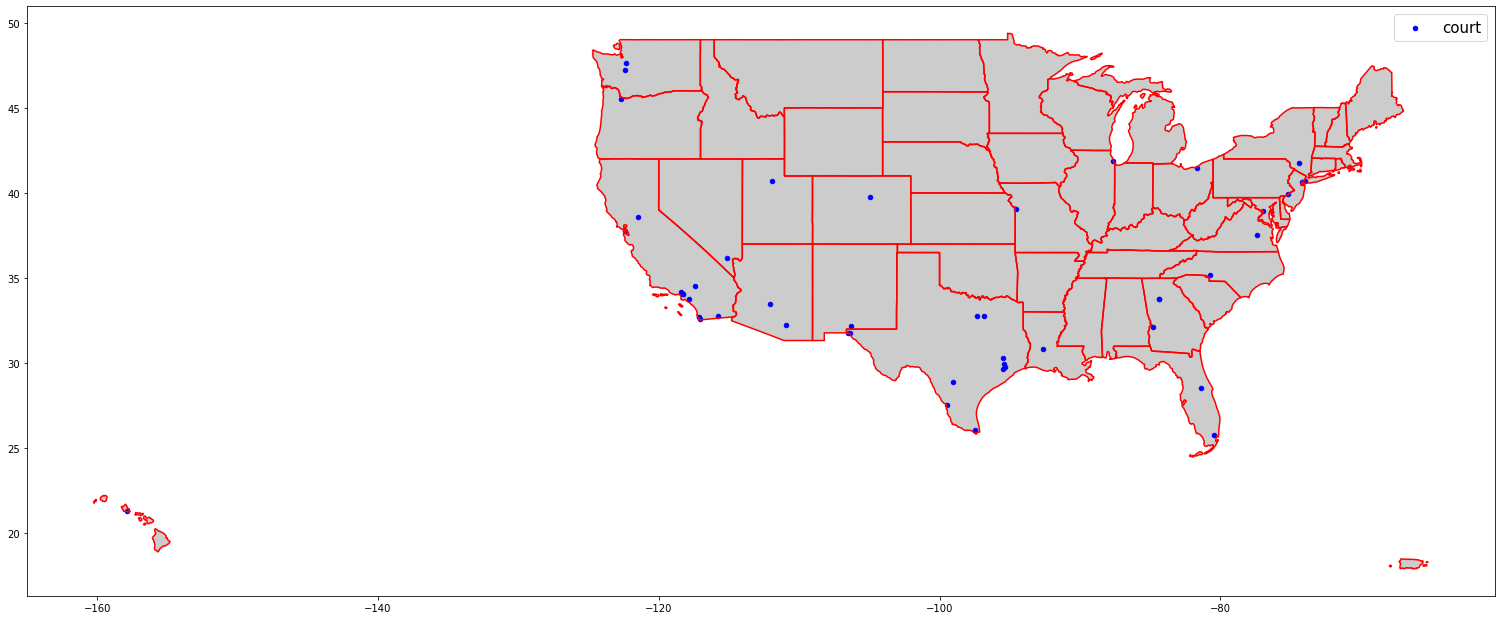

In [619]:
fig,ax = plt.subplots(figsize = (lonsize,latsize))
us_map.plot(ax = ax, alpha = 0.4, color='grey')
us_map.boundary.plot(ax=ax, color='red')
geo_df.plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label= "court")

plt.legend(prop={'size':15})

In [620]:
BBox

(-157.8621245, -74.003112, 21.303383, 47.60460936666667)

In [621]:
latsize=abs((BBox[0] -BBox[1]))
lonsize=abs((BBox[2]-BBox[3]))
print(lonsize, latsize)

26.301226366666672 83.85901249999999
